## Assignment 2
## By Zeyu
## Summer 2021

 1) Exercise 5.1

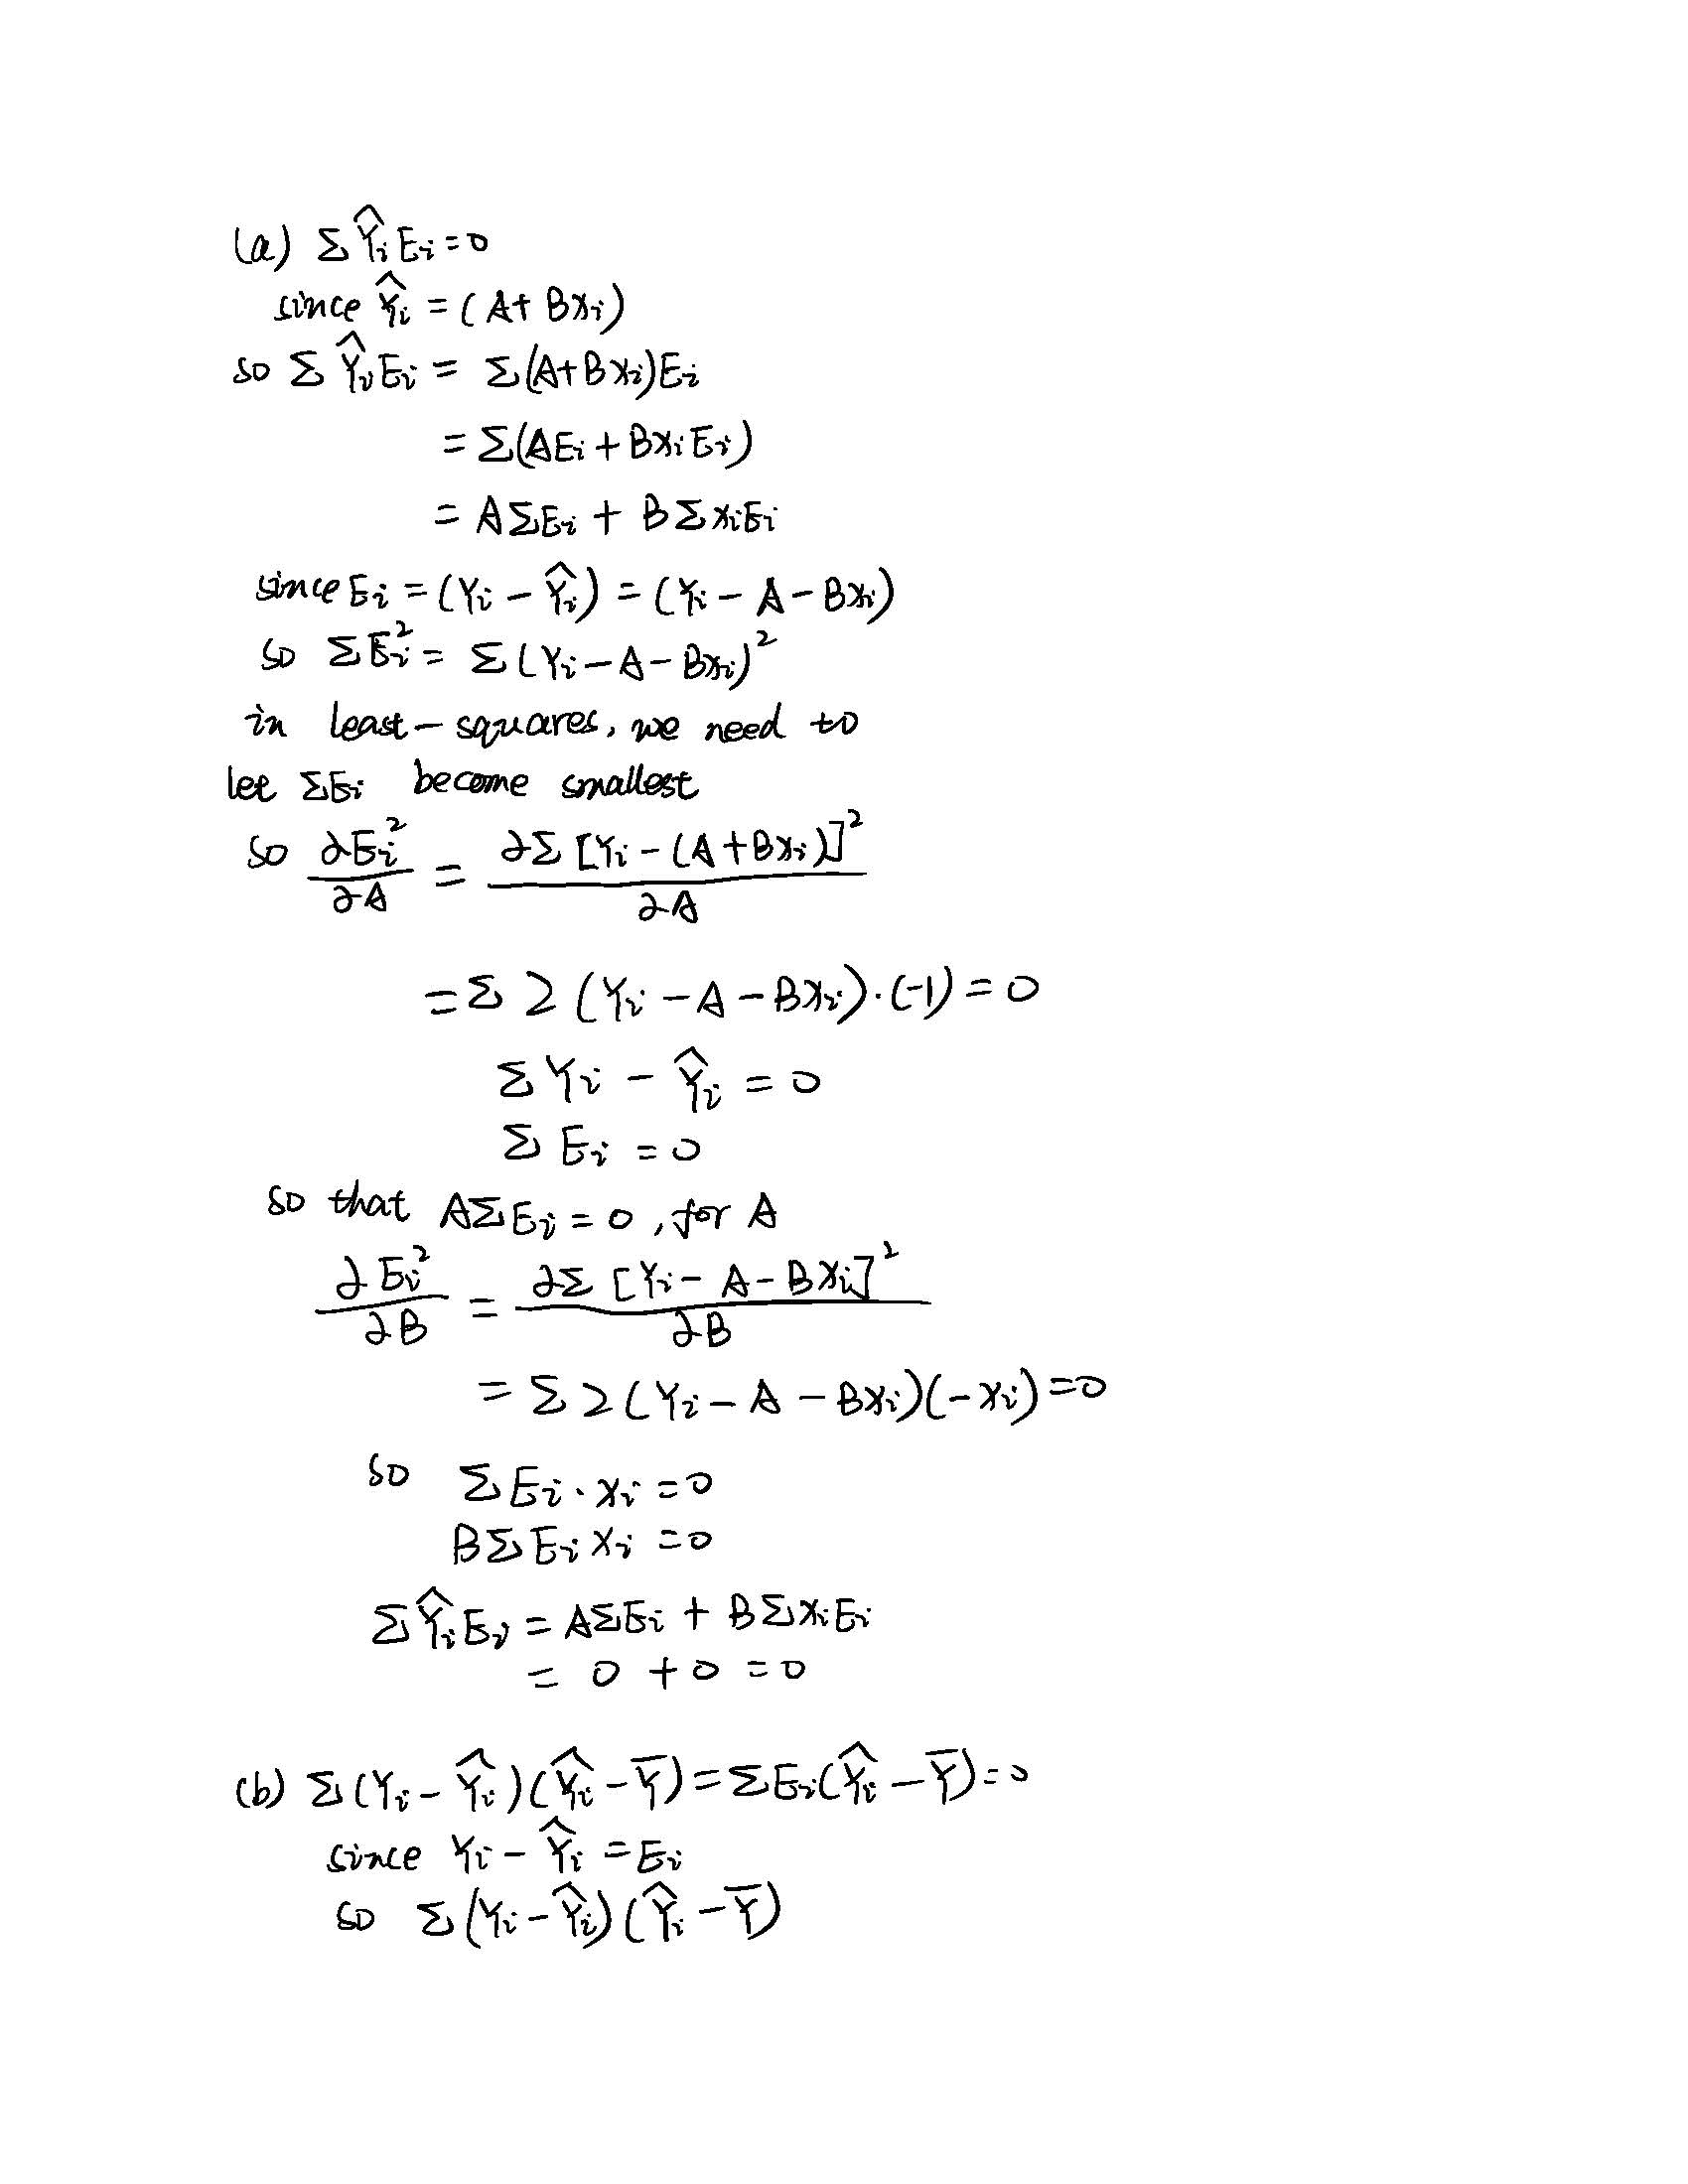


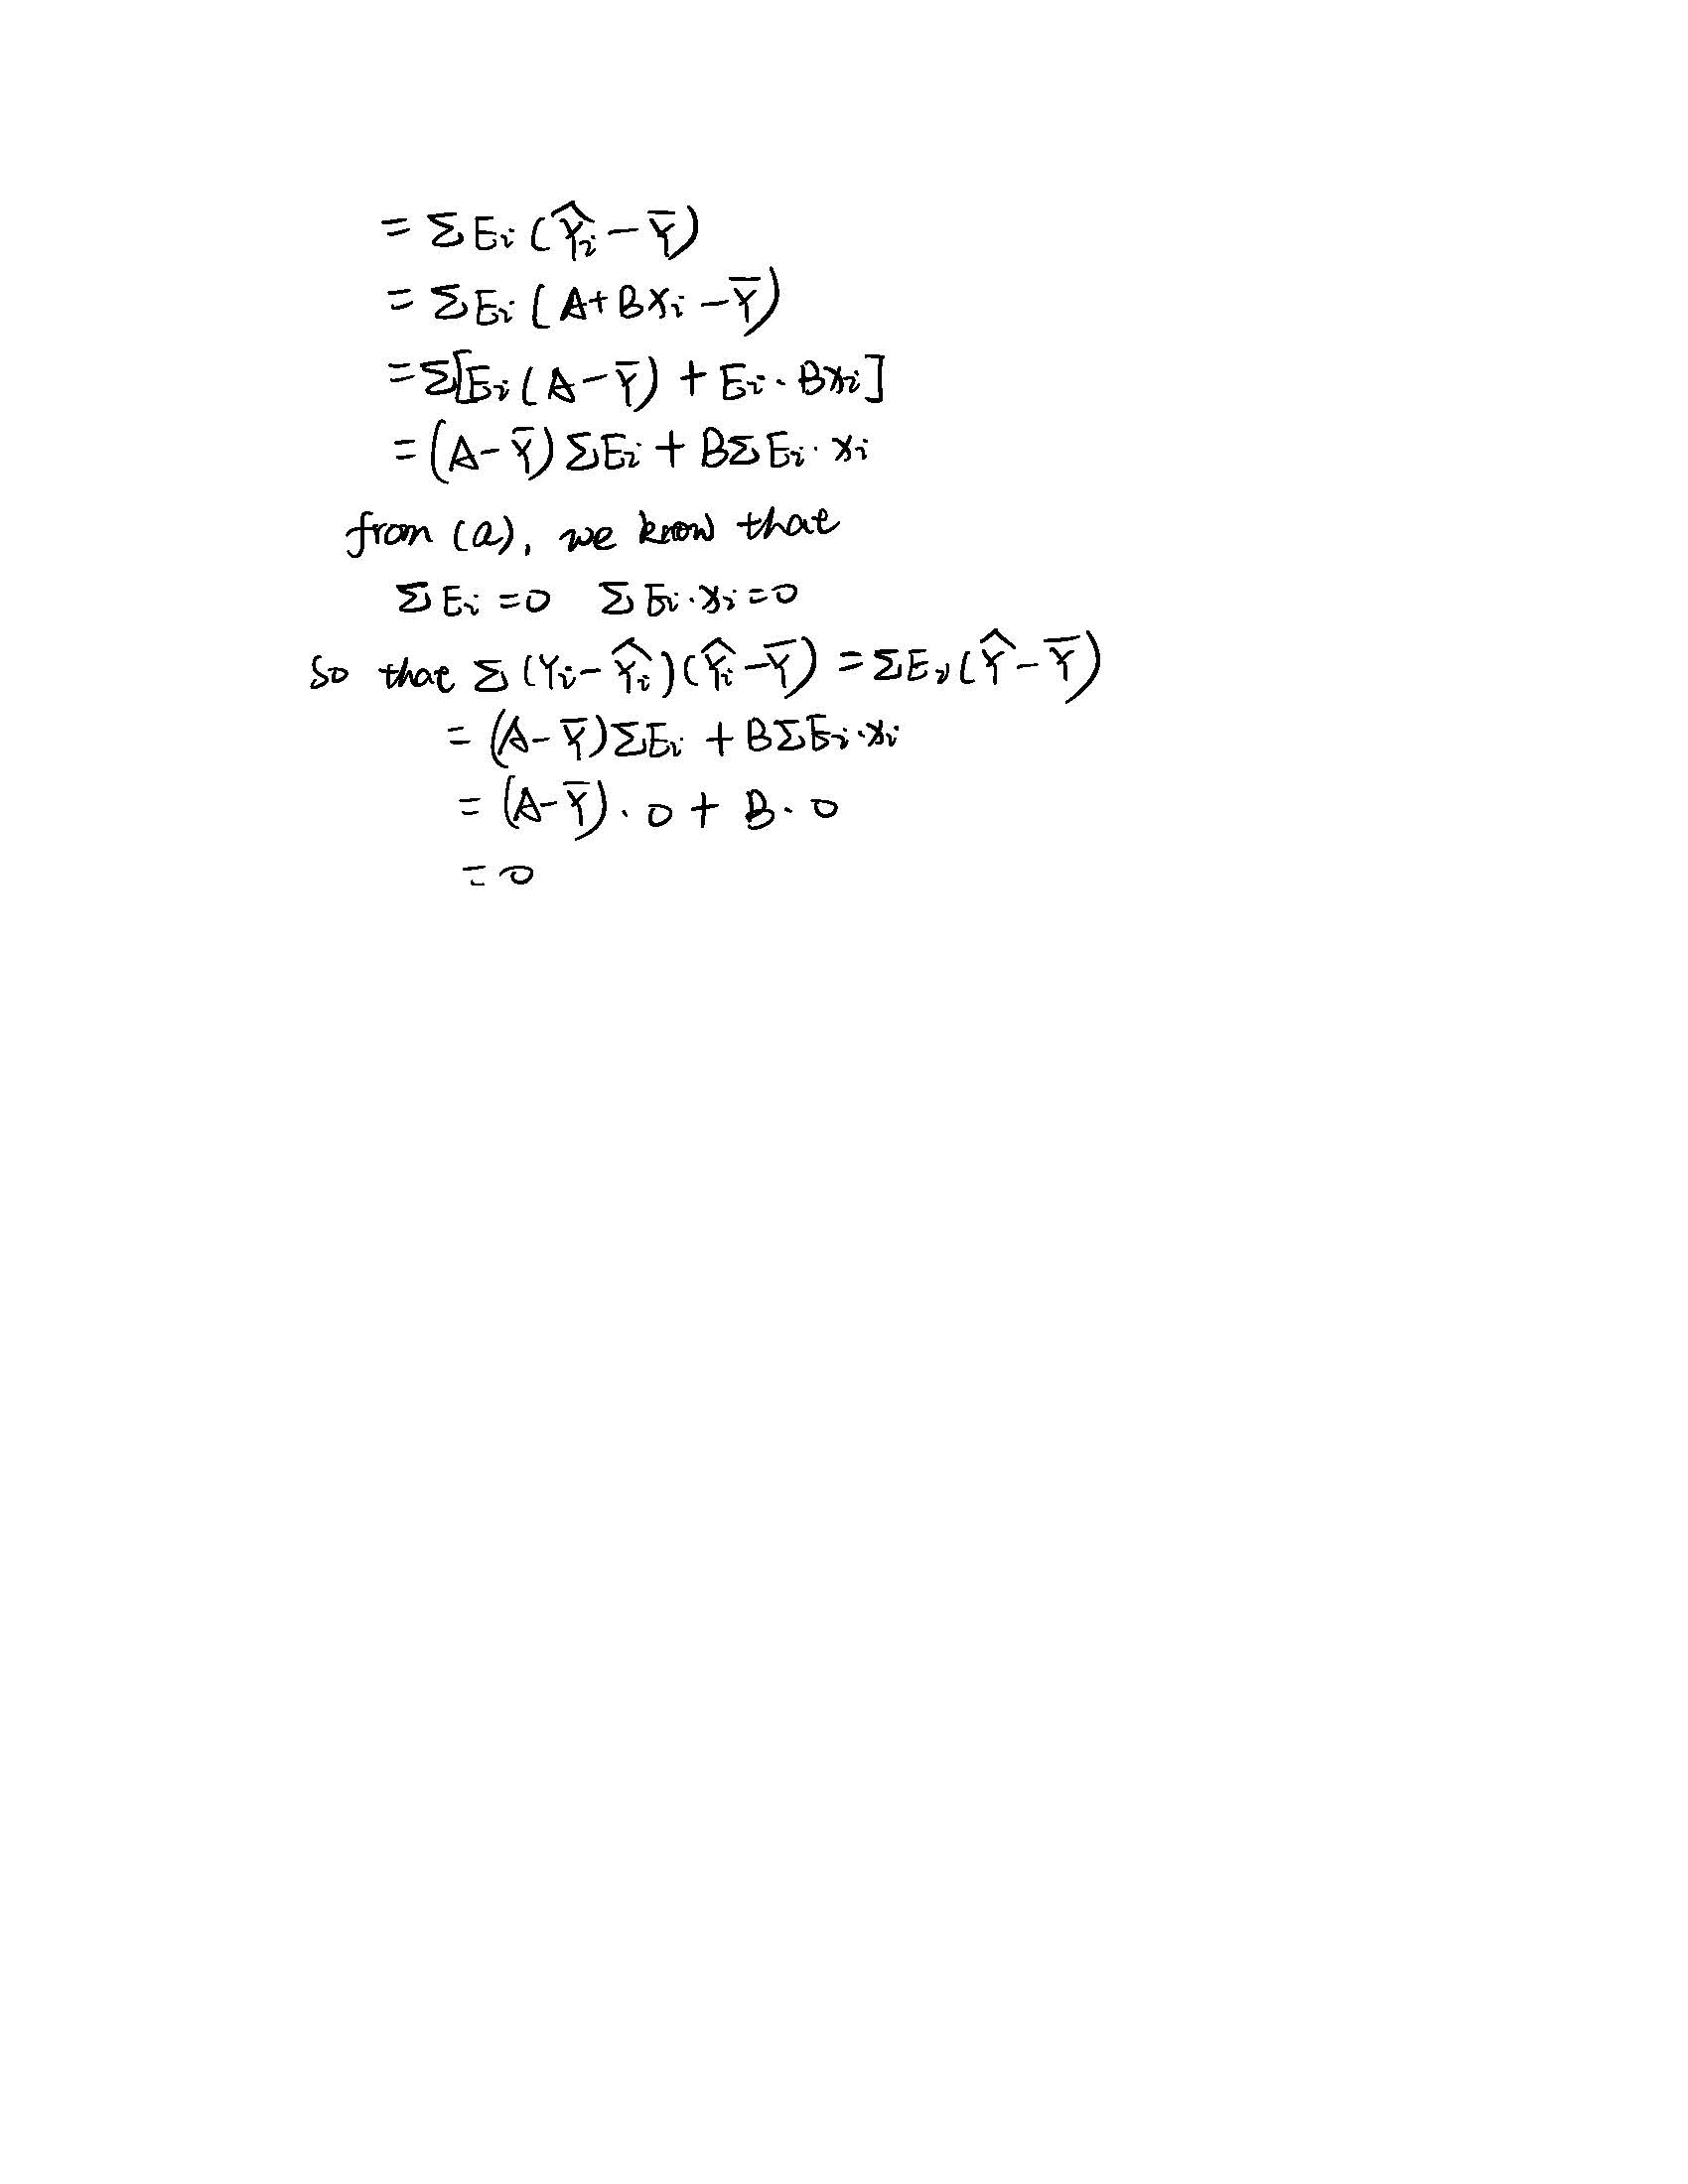

2）Lab:Build a linear model.

### 2.1) Data source:

My data is about the year experience and salary which come from the website. I download it and upload it to my Github. Then I can use pandas to read it.

### 2.2) Import data 

In this part, I will import year experience and salary from Github by pandas. 

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [87]:
df = pd.read_csv('https://raw.githubusercontent.com/NewThread-ZY/AIM-5004-100/main/salaryData.csv',dtype = float)
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


### a.collect data

We do some EDA and sure the linear relationship between year experience and salary.

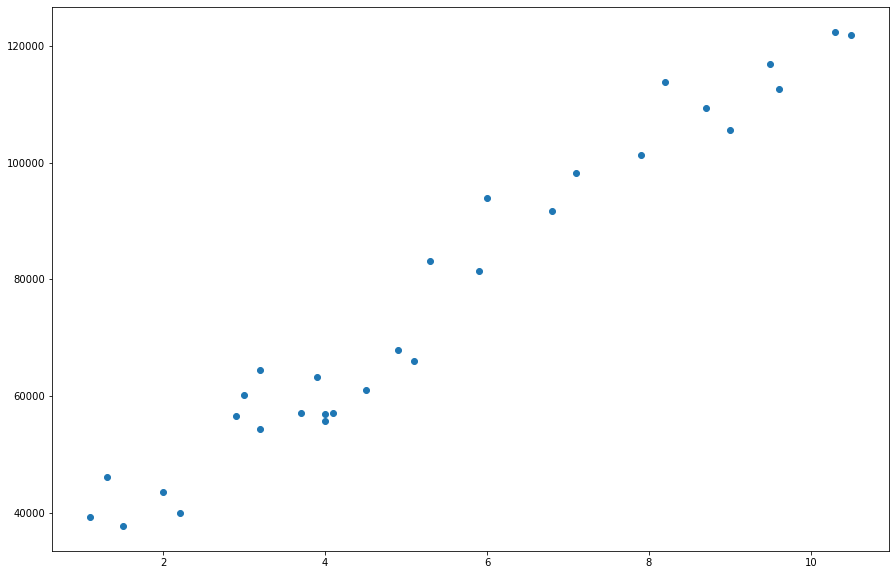

<Figure size 432x288 with 0 Axes>

In [62]:
#"Year Experience" and "salary"
plt.figure(figsize=(15,10))
plt.scatter(df['YearsExperience'], df['Salary'])
plt.show()
plt.tight_layout()

In [88]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


I think they have a well linear relationship.

### b. calculate A and B and create linear model.

I can use the following formula to create my linear regression model. I minimize the ei to get the formula of A(alpha) and B(bata). Use Y = A+Bx, this is m

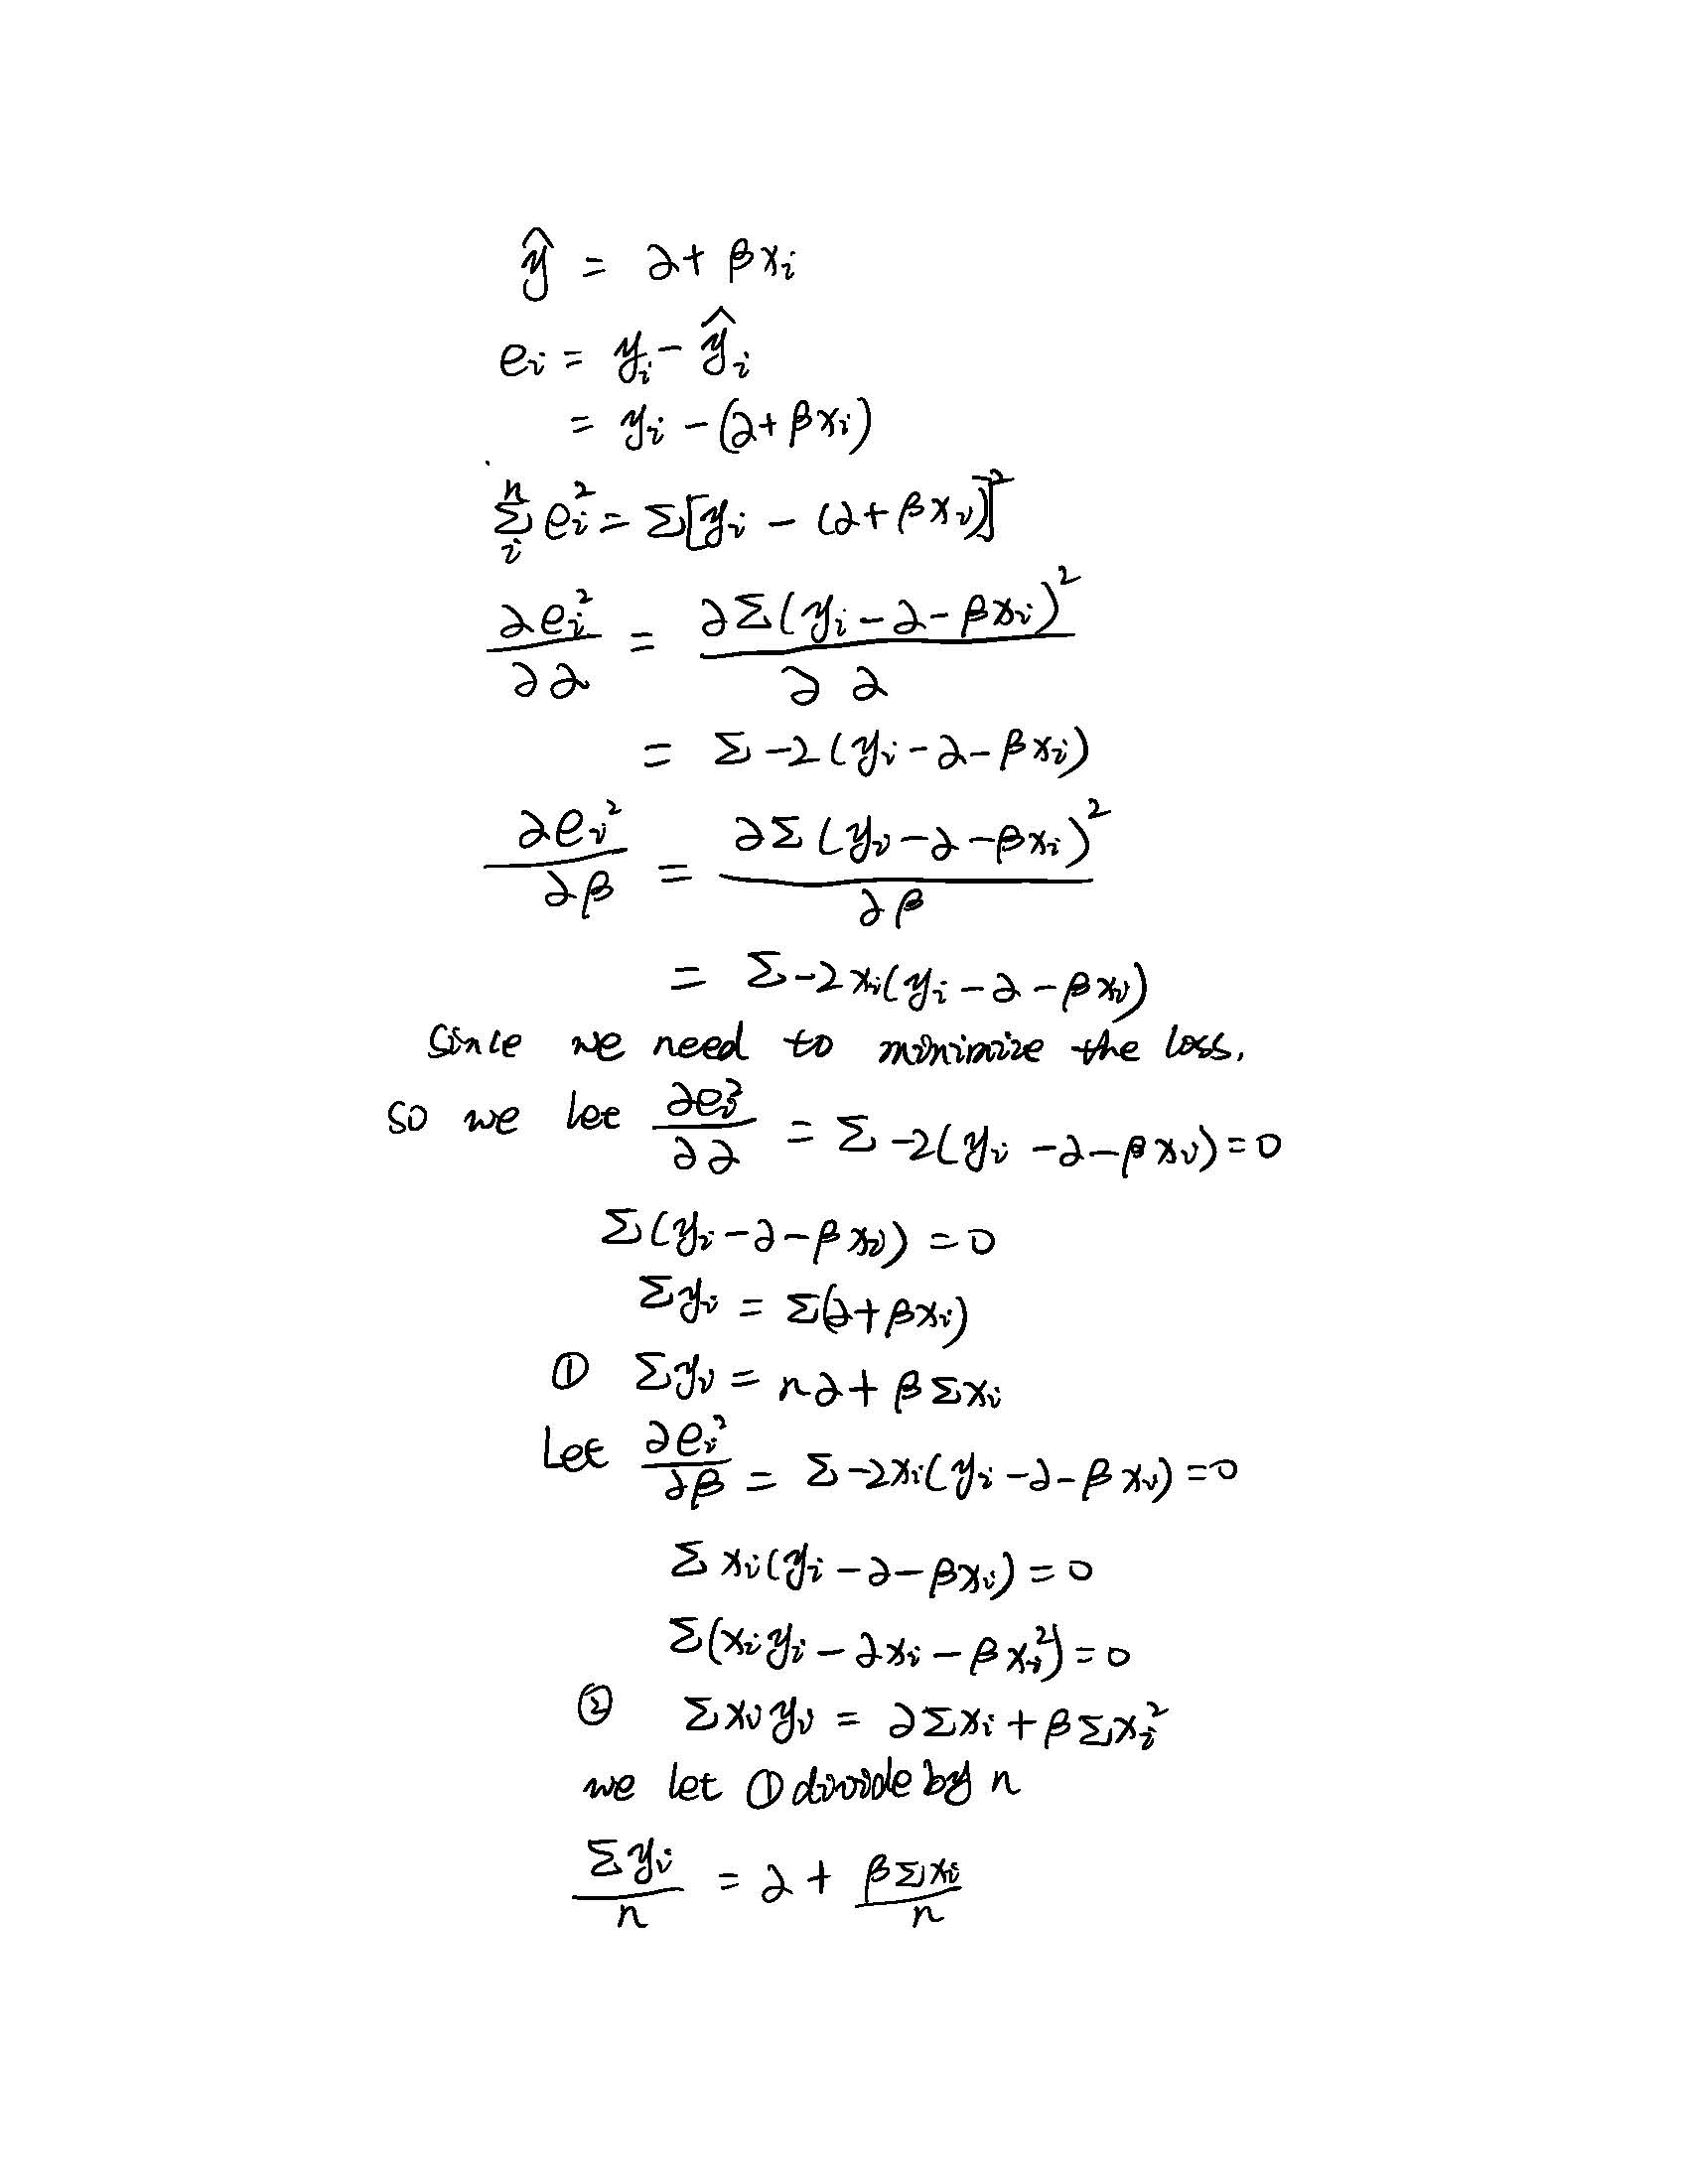

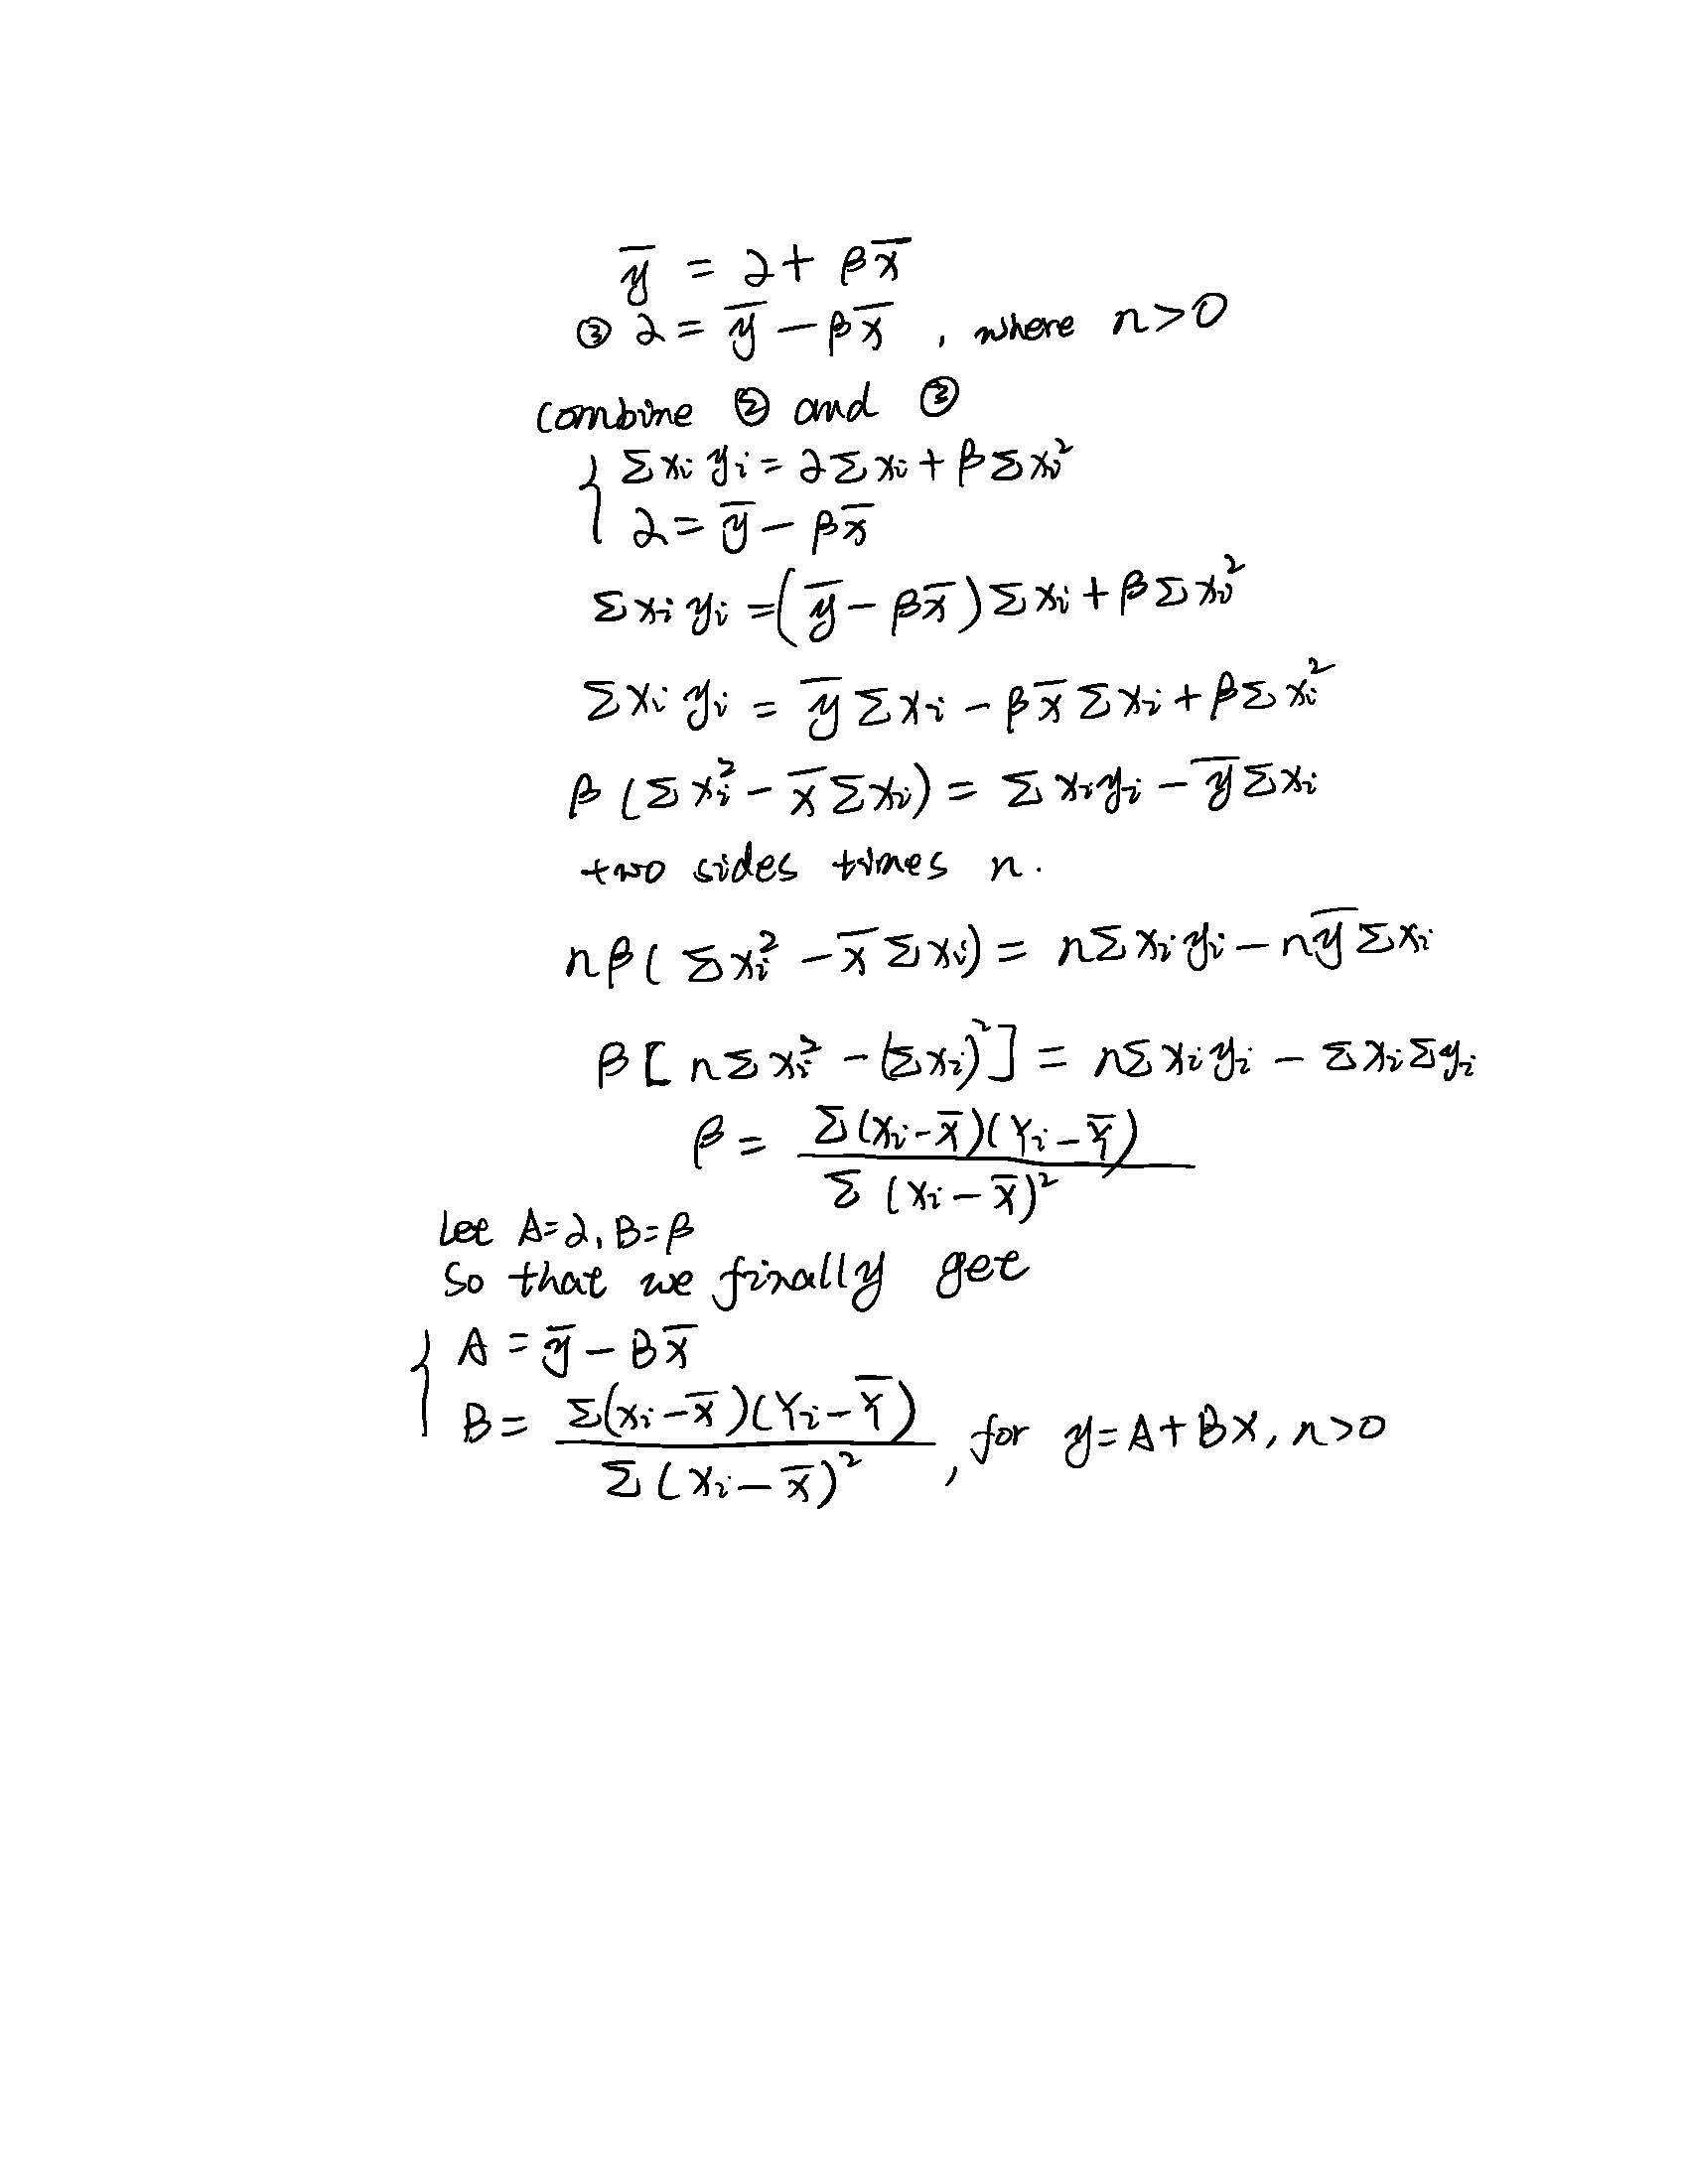

In [89]:
def loss_function(x,y,a,b):
    '''
    This function is used to calculate a linear regression model's error.
    This function needs 4 parameters. x is the variable. Y depends on x.
    a and b are the linear regression model's coefficients.
    ---------------------------------------------------------------------
    After calculate, this function will return the error between the real y and predict y.
    '''
    error = 0
    for i in range(len(x)):
        error += a+b*x[i]-y
    return error

In [90]:
def calculateAB(x, y):
    '''
    This function is used to calculate the Linear least-squares regression coefficient A and B.
    This function needs to receipt two lists about the x and y. X and Y have a linear relationship.
    The equation is y = a+bx+e
    -----------------------------------------------------------------------------------------
    Finally, this function will return two numbers which is Linear least-squares regression coefficient A and B.
    '''
    x = np.array(x)
    y = np.array(y)
    ym = y-y.mean()
    xm = x-x.mean()
    bata = (xm*ym).sum()/(xm**2).sum()
    alpha = y.mean()-bata*x.mean()
    print(alpha, bata)
    return alpha, bata

In [91]:
alpha, bata = calculateAB(df['YearsExperience'], df['Salary'])

25792.20019866869 9449.962321455077


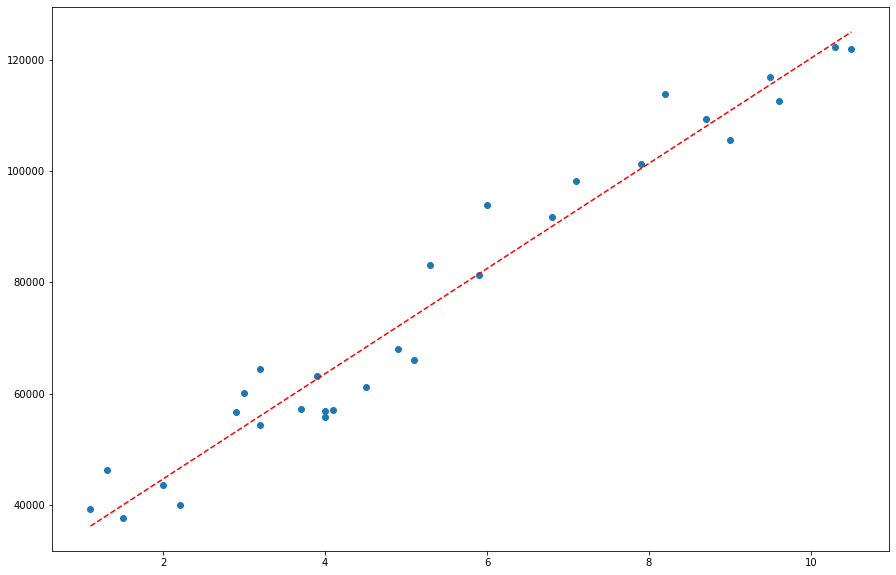

<Figure size 432x288 with 0 Axes>

In [92]:
#fixed year experience and "salary"
plt.figure(figsize=(15,10))
plt.scatter(df['YearsExperience'], df['Salary'])
plt.plot(df['YearsExperience'], alpha+bata*df['YearsExperience'],'r--')
plt.show()
plt.tight_layout()

## e) calculate SSE, RegSS, TSS, r(2), and the correlationbetween x and y.

In [66]:
sse = 0
for i in range(len(df['YearsExperience'])):
    sse+=((df['Salary'][i]-(alpha+bata*df['YearsExperience'][i]))**2)
print(sse)


938128551.6684291


In [67]:
TSS = 0
ymean = df['Salary'].mean()
for i in df['Salary']:
    TSS+=(i-ymean)**2
print(TSS)

21794977852.0


In [68]:
RSS = 0
for i in range(len(df['YearsExperience'])):
    RSS+=((df['Salary'][i]-(alpha+bata*df['YearsExperience'][i]))**2)
print(RSS)

938128551.6684291


In [69]:
RegSS = TSS-RSS
RegSS

20856849300.33157

In [70]:
squrt_r = RegSS/TSS
squrt_r

0.9569566641435084

In [71]:
r = squrt_r**0.5
r

0.9782416184887599

In [72]:
df['YearsExperience'], df['Salary']
ym = df['Salary']-df['Salary'].mean()
xm = df['YearsExperience']-df['YearsExperience'].mean()
corr = (xm*ym).sum()/np.sqrt((xm**2).sum()*(ym**2).sum())
corr

0.97824161848876

### f.

In [73]:
YiEi = 0
for i in range(len(df['YearsExperience'])):
    YiEi+=(alpha+bata*(df['YearsExperience'][i]))*(df['Salary'][i]-(alpha+bata*(df['YearsExperience'][i])))
YiEi

-1.7881393432617188e-06

I think it's so small that can be said to equal 0 because there is some error in alpha and bata due to the problem of computer.

In [82]:
int(YiEi)

0

In [83]:
XiEi = 0
a = (df['Salary']*df['YearsExperience']).sum()-alpha*df['YearsExperience'].sum()
b = 0
for i in df['YearsExperience']:
    b += i**2
XiEi = a-bata*b
XiEi

0.0

### g)

Yes, x cause y. In my model, I use data x and y to get the linear regression coefficient which makes the error become smallest and we get A and B.Then use A and B to create a linear math function. This function only needs the x and uses it to times with B and plus A to form the predict the result y. So the line fit these point well.

In [84]:
year = [int(i)+11 for i in range(10)]
predicr_salary = []
for i in year:
    predicr_salary.append(alpha+bata*i)
dfYearsExperience = list(df['YearsExperience'])
dfYearsExperience = dfYearsExperience+year
Salary = list(df['Salary'])
Salary = Salary+predicr_salary
dat = {"YearsExperience":dfYearsExperience,"Salary":Salary}
df1 = pd.DataFrame(dat)
df1

,YearsExperience,Salary
0,1.1,39343.000000
1,1.3,46205.000000
2,1.5,37731.000000
3,2.0,43525.000000
4,2.2,39891.000000
5,2.9,56642.000000
6,3.0,60150.000000
7,3.2,54445.000000
8,3.2,64445.000000
9,3.7,57189.000000


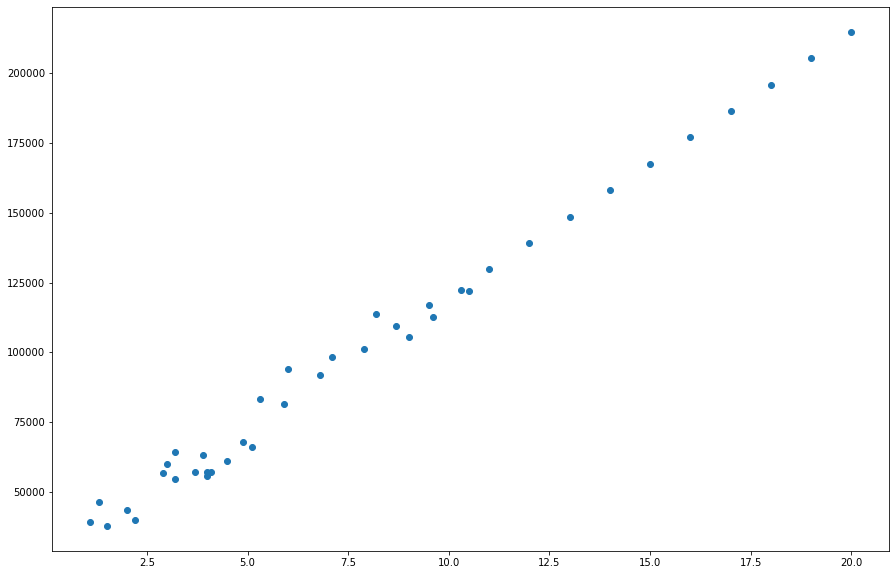

<Figure size 432x288 with 0 Axes>

In [85]:
plt.figure(figsize=(15,10))
plt.scatter(df1['YearsExperience'], df1['Salary'])
plt.show()
plt.tight_layout()

### Because I have a clear number a and b in my model. I can use the new X data to form the predicted Y data. Like what I did above, I predict the salary of 11 to 20 years experience which we don't get from the given data set.
